In [2]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt


# 약 15분정도 걸립니다.
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)


In [3]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [4]:
print(len(tokenized))

71156


In [5]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

[('작품', 0.89157634973526),
 ('다큐멘터리', 0.8486157059669495),
 ('드라마', 0.8372445106506348),
 ('영화로', 0.8132178783416748),
 ('코미디', 0.8064197301864624),
 ('형식', 0.7928596138954163),
 ('주제', 0.7881873846054077),
 ('감동', 0.7857135534286499),
 ('소재', 0.7747325301170349),
 ('제목', 0.760572612285614)]

In [6]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

print("슝~")

슝~


In [25]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [26]:
#vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_df=0.85, stop_words=['영화', '이야기'])
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 25452)


In [27]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
지라니, 불찰, 규민, 볼쇼, 순영, 예준, 아이누, 유영철, 무쉬, 야스쿠니, 나다니엘, 비랄, 석용, 한대수, 토미카, 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


아화, 병운, 이샨, 디앤, 수욱, 숏버스, 원훈, 하치코, 질베르트, 장닝, 가츠노, 노승, 승업, 구구, 송현, 영건, 나즈나, 밀례나, 가부, 듀란, 딘딘, 정득, 리윈펑, 호찬, 가위눌림, 릿카, 니켈, 비보잉, 홀츠, 안드라스, 도그빌, 거미숲, 이감, 바웬사, 청림, 데레사, 쿰바, 성미산, 현순, 루비살롱, 거칠마루, 종섭, 신웅, 신덴, 장경, 띠마, 써머, 시형, 양산박, 고정원, 파비아, 크리스티아노, 배틀오브더이어, 비투스, 아틸리오, 카포티, 변학범, 돌포, 브리스, 우남, 사일런스, 혁진, 이원상, 까미유, 창국, 채미, 관타나모, 박덕, 아렌다, 황제펭귄, 밍쿠, 브러시, 발드, 송사, 심유, 가후, 호쿠, 노준, 포욱, 급시, 영택, 아키히토, 아르파, 비글, 싱크로나이즈, 

일반영화를 대표하는 단어들:
아시아나, 도롱, 인권영화제, 테드, 타케시, 경력, 퍼니퍼, 메트로, 카즈야, 큐빅스, 페스트, 애무, 미장센단편영화제, 엽기, 영훈, 코드, 빈스, 건축사, 소비, 와이드, 점프, 상제, 곰퉁, 마유미, 스와핑, 사오리, 전복, 추상, 성현, 육감, 삼순, 나츠미, 의붓아들, 아리사, 다이스케, 임팩트, 동현, 숙희, 게리, 강력반, 공중, 나오키, 기철, 마작, 쇼코, 콜롬비아, 스타크, 커피숍, 오오시마, 로보트, 채널, 지환, 미치루, 대호, 토네이도, 후지, 유성, 레미, 숨바꼭질, 투수, 벙커, 미얀마, 체첸, 아영, 과자, 우수상, 마누, 혼령, 파친코, 토마토, 모기, 타키, 음란, 가가, 아유미, 스펜서, 요시다, 종수, 행크, 명주, 정욱, 우석, 양쪽, 대부, 소스, 팬티, 블레이드, 퇴원, 진헌, 케코, 태호, 쿠로다, 리플리, 태주, 쟈니, 성호, 헤더, 커크, 폭주족, 마구, 

In [28]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [29]:
print(target_art)

['지라니', '불찰', '규민', '볼쇼', '순영', '예준', '아이누', '유영철', '무쉬', '야스쿠니', '나다니엘', '비랄', '석용', '한대수', '토미카']


In [30]:
print(target_gen)

['아시아나', '도롱', '인권영화제', '테드', '타케시', '경력', '퍼니퍼', '메트로', '카즈야', '큐빅스', '페스트', '애무', '미장센단편영화제', '엽기', '영훈']


In [31]:
# 장르별 텍스트 파일 리스트 및 레이블
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt',
             'synopsis_etc.txt', 'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt',
             'synopsis_musical.txt', 'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt',
             'synopsis_western.txt', 'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt',
             'synopsis_action.txt', 'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt',
             'synopsis_fantasy.txt']

genre_name = ['SF', '가족', '공연', '공포', '기타', '다큐', '드라마', '로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부',
              '성인물', '스릴러', '애니', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [ ]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.


In [18]:
vectorizer = TfidfVectorizer(max_df=0.8, stop_words=['영화', '이야기'])
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 41469)


In [19]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 인류, 우주, 로봇, 우주선, 외계, 행성, 실험, 시스템, 생명체, 스타크, 리플리, 과학자, 파괴, 켈빈, 컨트, 
가족: 아주르, 낙타, 씨제이, 동구, 슈이트, 마갈, 미아, 펠리칸, 벤트, 케이시, 할아버지, 엠마, 고양이, 크리스마스, 최호, 
공연: 오페라, 토스카, 실황, 올레, 카바, 오텔로, 리골레토, 백작, 프레, 베르디, 카르피, 비바, 왕자, 콘서트, 백작부인, 
공포: 악령, 저주, 시체, 악몽, 유령, 귀신, 바이러스, 현상, 사라, 살인마, 실험, 인형, 분홍신, 건물, 연구, 
기타: 뉴미디어, 페스티벌, 아시아나, 상영작, 지하철, 청소년, 노인, 포럼, 메트로, 단편영화, 풍경, 부문, 실험영화, 애니메이션, 대화, 
다큐: 다큐, 다큐멘터리, 노동자, 투쟁, 인디다큐페스티발, 북한, 문화, 건축, 인터뷰, 풍경, 질문, 등반, 밴드, 노래, 인권영화제, 
드라마: 부문, 노인, 회사, 할아버지, 섹스, 포럼, 남자친구, 전주, 동네, 노래, 선생님, 청소년, 여자친구, 드라마, 퀴어, 
로맨스: 섹스, 회사, 연애, 새엄마, 불륜, 남자친구, 유부녀, 정사, 출장, 선배, 여자친구, 동거, 이혼, 시아버지, 욕구, 
뮤지컬: 뮤지컬, 에스메랄다, 충무로, 모차르트, 토스카, 니웨, 카바, 바흐, 페뷔스, 프롤, 모도, 카르피, 제루샤, 샤오캉, 데이비, 
미스터리: 민혁, 미스터리, 형사, 현우, 방독면, 용의자, 수사, 랭던, 시체, 몰카, 지목, 불명, 거미숲, 사이먼, 의사, 
범죄: 범죄, 형사, 수사, 한길수, 은행, 보스, 마피아, 용의자, 시체, 프랭크, 파푸아, 금고, 교도소, 테러범, 강도, 
사극: 조선, 신기전, 아가멤논, 황제, 루안, 하선, 윤서, 트로이, 세자, 허균, 노준, 채선, 신재효, 히파티아, 아킬레스, 
서부: 서부, 보안관, 벌린, 카우보이, 그레이프바인, 헨리, 개릿, 무법자, 프린트, 마적, 태구, 현상금, 버질, 랜던, 스탠리, 
성인물: 마사지, 섹스, 정사, 유부녀, 에피

In [20]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [21]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [22]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [23]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 0.25136408
SF 공연 -0.006149445
SF 공포 0.22376634
SF 기타 0.2655651
SF 다큐 -0.10001205
SF 드라마 0.5103627
SF 로맨스 0.4639351
SF 뮤지컬 0.04279389
SF 미스터리 0.35381097
SF 범죄 0.3485424
SF 사극 0.09667985
SF 서부 -0.012835381
SF 성인물 0.5184061
SF 스릴러 0.3697416
SF 애니 0.32250166
SF 액션 0.15548933
SF 어드벤처 0.06499556
SF 전쟁 -0.10168439
SF 코미디 0.43846005
SF 판타지 0.12386964
가족 공연 -0.2787336
가족 공포 -0.13009068
가족 기타 -0.020967212
가족 다큐 -0.23020495
가족 드라마 0.20669779
가족 로맨스 0.5812516
가족 뮤지컬 -0.20825194
가족 미스터리 0.16137302
가족 범죄 0.09123503
가족 사극 -0.24178815
가족 서부 -0.3900306
가족 성인물 0.65332586
가족 스릴러 0.1784573
가족 애니 -0.083576076
가족 액션 -0.160593
가족 어드벤처 -0.501845
가족 전쟁 -0.25424576
가족 코미디 0.42620295
가족 판타지 -0.4381461
공연 공포 0.20356181
공연 기타 0.33547372
공연 다큐 -0.100690655
공연 드라마 0.9253901
공연 로맨스 0.5547977
공연 뮤지컬 0.17987524
공연 미스터리 0.396235
공연 범죄 0.4011744
공연 사극 0.23904523
공연 서부 -0.010408749
공연 성인물 0.6273948
공연 스릴러 0.45089605
공연 애니 0.41766897
공연 액션 0.1592106
공연 어드벤처 0.06306718
공연 전쟁 -0.1007071
공연 코미디 0.6063381
공연 판타지 0.112590

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

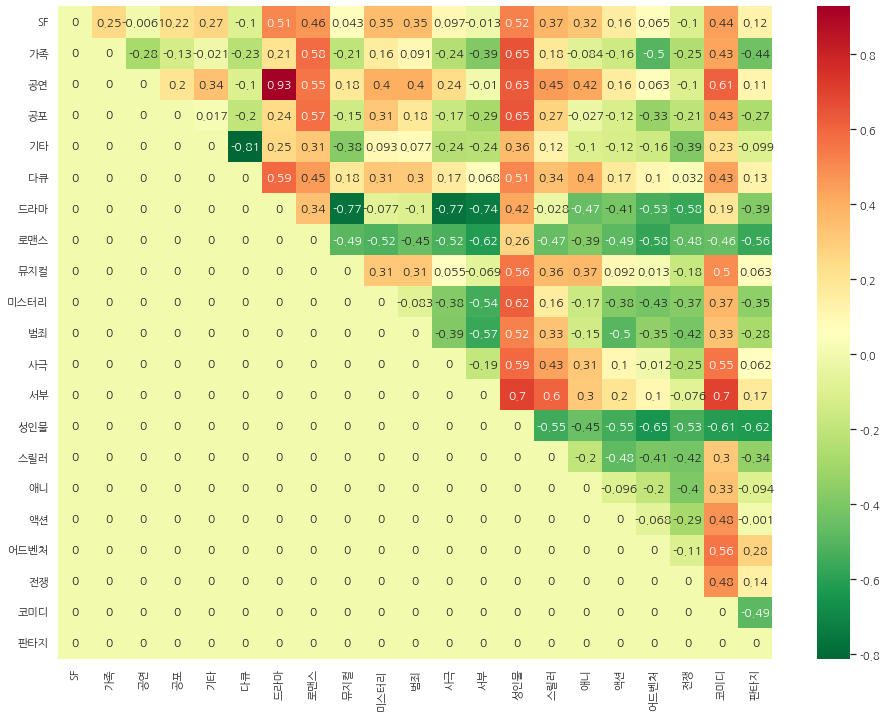

In [24]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')
plt.figure(figsize=(16, 12))  # 크기 조정
# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

⬆️ min_df = 0.85로 설정

# 회고

min_df 설정 없이 돌린 결과

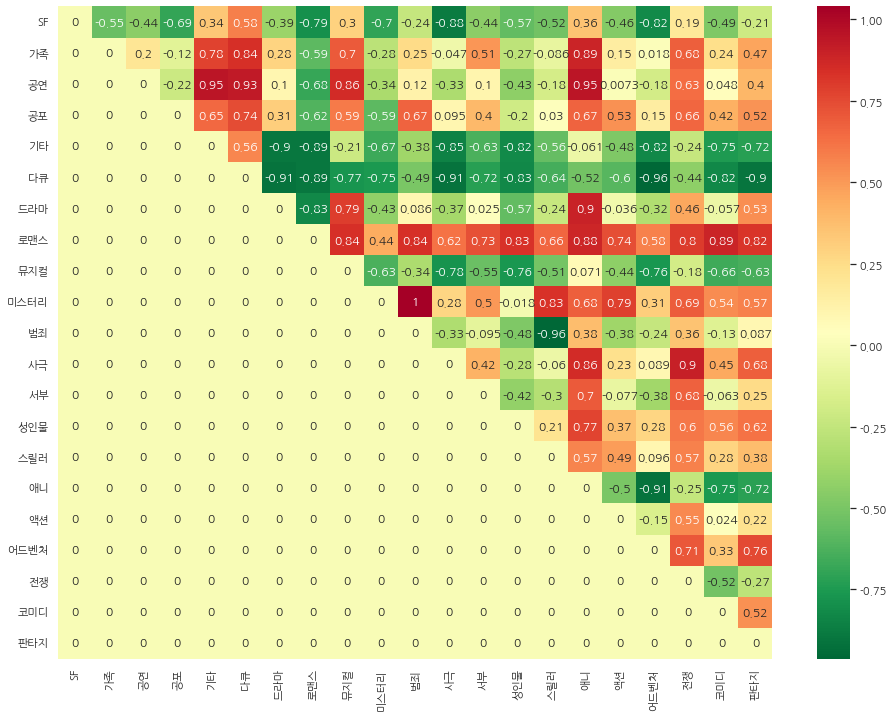

min_df 설정으로 결과값이 정반대가 되었다,,! 이게 맞는건가,,?
데이터에 대해 조금 더 뜯어봐야할 것 같다.